In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm.notebook import tqdm

from scipy.stats import norm
from scipy import integrate

def function_H(T):
    return 1-norm.cdf(T)

def function_in_G(h,x,T):
    
    return np.exp(-h**2/2)*function_H( ((1-x)*h-T) / np.sqrt(x*(2-x)) )/np.sqrt(2*np.pi)

def function_G(delta_s,f,T):
    
    Int_res, err = integrate.quad(function_in_G,T,np.inf,args=(delta_s,T))
    
    return Int_res/(f*(1-f))

def function_in_I(h1,h2,delta):
    
    return np.exp( -0.5*h1**2 - 0.5*h2**2 + 0.5*(1-delta)*h1*h2 ) / (2*np.pi)
    
def function_I(T,delta):
    
    T_delta = T / np.sqrt(1-0.25*(1-delta)**2)
    
    
    Int_res, err = integrate.dblquad(function_in_I, T_delta, np.inf, lambda h1: T_delta, lambda h1: np.inf, args=(delta,))
    
    return Int_res

def function_in_g(h1,h2,delta):
    
    return h1*h2*np.exp( -0.5*h1**2 - 0.5*h2**2 + 0.5*(1-delta)*h1*h2 ) / (2*np.pi)


def function_g(T,delta):
    
    T_delta = T / np.sqrt(1-0.25*(1-delta)**2)
    
    
    Int_res, err = integrate.dblquad(function_in_g, T_delta, np.inf, lambda h1: T_delta, lambda h1: np.inf, args=(delta,))
    
    return Int_res

def s_delta(delta):
    
    return np.sqrt(1 - 0.25*(1-delta)**2)

def q1_func(f,T,delta_sigma):
    
    return f-f*(1-f)*function_G(delta_sigma,f,T)

def q2_func(f,T,delta_eta):
    
    return f-f*(1-f)*function_G(delta_eta,f,T)


def q_func(p1,p2,p3,f,T,delta_sigma,delta_eta):
    
    delta_mix = (delta_sigma + delta_eta) / 2.
    
    delta_m = p1*function_G(delta_sigma,f,T) + p2*function_G(delta_eta,f,T) +  p3*function_G(delta_mix,f,T)
    
    return f - delta_m*f*(1-f)

def numerator_func(Nc,q,f):
    return Nc**2 * (q-f**2)**2


def part1_func(Nc,q,f):
    
    return Nc* ( q*(1-2*f)**2 + 2*f**3 - 3*f**4 )


def part3_func(Nc,N,M,P,K,p1,p2,p3,f,T,q1,q2,delta_sigma,delta_eta):
    
    uni_term = Nc*(P*K-1) * f**2 * (1-f)**2
    
    excess_term1 = Nc*(2*f-1)**2 * ( (K-1)*p1*(q1-f**2) + (P-1)*p2*(q2-f**2) )
    
    excess_term2 = Nc*(2*f-1)**2 * p3 * (K-1) * s_delta(delta_sigma) * function_I(T, delta_sigma)
    
    excess_term3 = Nc*(2*f-1)**2 * p3 * (P-1) * s_delta(delta_eta) * function_I(T, delta_eta)
    
    excess_term4 = Nc*(2*f-1)**2 * p3 * f**2 * (P+K-2)
    
    return uni_term + excess_term1 + excess_term2 + excess_term3 - excess_term4

def part4_func(Nc,N,M,P,K,p1,p2,p3,f,T,q1,q2,delta_sigma,delta_eta):
    
    T_sigma = T / np.sqrt(1-0.25*(1-delta_sigma)**2)
    T_eta = T / np.sqrt(1-0.25*(1-delta_eta)**2)
    
    term1 = (Nc*p1)**2 * (K-1) * (q1-f**2)**2
    term2 = (Nc*p1)**2 * (P*K-K) * (1/N) * (np.exp(-2*T**2)/(2*np.pi)**2)
    
    term3 = (Nc*p2)**2 * (P-1) * (q2-f**2)**2
    term4 = (Nc*p2)**2 * (P*K-P) * (1/M) * (np.exp(-2*T**2)/(2*np.pi)**2)
    
    term51 = (Nc*p3)**2 * (K-1) * ( (s_delta(delta_sigma)*function_I(T,delta_sigma) - f**2 )**2 + s_delta(delta_sigma)**2 *\
                                 (1/(4*M)) *  (function_g(T, delta_sigma)**2) )
    
    term52 = (Nc*p3)**2 * (P-1) * ( (s_delta(delta_eta)*function_I(T,delta_eta) - f**2 )**2 + s_delta(delta_eta)**2 *\
                                 (1/(4*N)) *  (function_g(T, delta_eta)**2) )
    
    term53 = (Nc*p3)**2 * (P*K-P-K+1) * ( 1/(4*M) + 1/(4*N) ) * (np.exp(-2*T**2)/(2*np.pi)**2)
    

    term61 = 2*(Nc**2)*p1*p3 * (K-1) * (s_delta(delta_sigma)*function_I(T,delta_sigma) - f**2) * (q1-f**2)
    
    term62 = 2*(Nc**2)*p1*p3 * (P-1) * s_delta(delta_eta) * (1/(2*N)) * ( (np.exp(-T**2)/(2*np.pi)) ) * ( function_g(T, delta_eta) )
    
    term63 = 2*(Nc**2)*p1*p3 * (P*K-P-K+1) * (1/(2*N)) * (np.exp(-2*T**2)/(2*np.pi)**2)
    
    term71 = 2*(Nc**2)*p2*p3 * (P-1) * (s_delta(delta_eta)*function_I(T,delta_eta) - f**2) * (q2-f**2)
    
    term72 = 2*(Nc**2)*p2*p3 * (K-1) * s_delta(delta_sigma) * (1/(2*M)) * ( (np.exp(-T**2)/(2*np.pi)) ) * ( function_g(T, delta_sigma) )
    
    term73 = 2*(Nc**2)*p2*p3 * (P*K-P-K+1) * (1/(2*M)) * (np.exp(-2*T**2)/(2*np.pi)**2)
    
    
    
    return term1 + term2 + term3 + term4 + term51 +  term52 + term53 + term61 + term62 + term63 + term71 + term72 + term73
    
    
def Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta):
    
    T = norm.ppf(1-f)
    q1 = q1_func(f,T,delta_sigma)
    q2 = q2_func(f,T,delta_eta)
    q = q_func(p1,p2,p3,f,T,delta_sigma,delta_eta)
    
    numerator = numerator_func(Nc,q,f)
    part1 = part1_func(Nc,q,f)
    part3 = part3_func(Nc,N,M,P,K,p1,p2,p3,f,T,q1,q2,delta_sigma,delta_eta)
    part4 = part4_func(Nc,N,M,P,K,p1,p2,p3,f,T,q1,q2,delta_sigma,delta_eta)
    
    SNR = numerator/ (part1 + part3 + part4)
    
    error = function_H(np.sqrt(SNR))
    
    return error,SNR

def Dimension_theory(Nc,N,M,P,K,p1,p2,p3,f):
    T = norm.ppf(1-f)
    q1 = q1_func(f,T,1e-5)
    q2 = q2_func(f,T,1e-5)
    q = q_func(p1,p2,p3,f,T,1e-5,1e-5)
    
    numerator = Nc**2 * f**2 * (1-f)**2
    part3 = part3_func(Nc,N,M,P,K,p1,p2,p3,f,T,q1,q2,1e-5,1e-5)
    part4 = part4_func(Nc,N,M,P,K,p1,p2,p3,f,T,q1,q2,1e-5,1e-5)
    part1 = Nc*(-3*f**4 + 6*f**3 - 4*f**2 + f)
    part2 = Nc**2*(f**4 - 2*f**3 + f**2)
    
    return P*K*numerator/(part3+part4+part1+part2)

### 1.$P=15, K=15, p1=p2=0.1, p3=0.8, \Delta_1 = 0.2, \Delta_2 = 0.1,0.3,0.5$ 

In [4]:
N = 100
M = 100
Nc = 1000
P = 15
K = 15
delta_sigma = 0.2
delta_eta_list = [0.1,0.3,0.5]
p1 = 0.1
p2 = 0.1
p3 = 0.8
flist = 10**np.linspace(-3,-0.3,30)

In [5]:
dim_f_theory_1 = np.zeros((3,50))
flist_dense = 10**np.linspace(-3.1,-0.28,50)

for j,f in enumerate(tqdm(flist_dense)):
    
    for i,delta_eta in enumerate(delta_eta_list):
        
        dim_f_theory_1[i,j] = Dimension_theory(Nc,N,M,P,K,p1,p2,p3,f)

In [16]:
simure4 = np.loadtxt(r'dimf1.txt',skiprows=1)

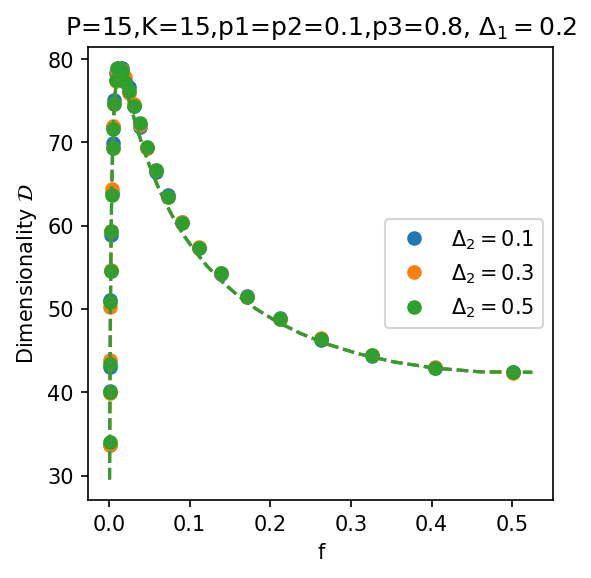

In [35]:
#display.set_matplotlib_formats('svg')
plt.figure(figsize=[4,4],dpi=150)
plt.plot(flist,simure4[0,:],'o',color='tab:blue',label=r'$\Delta_2=0.1$')
plt.plot(flist,simure4[1,:],'o',color='tab:orange',label=r'$\Delta_2=0.3$')
plt.plot(flist,simure4[2,:],'o',color='tab:green',label=r'$\Delta_2=0.5$')
plt.plot(flist_dense,1.04*dim_f_theory_1[0,:],'--',color='tab:blue',)
plt.plot(flist_dense,1.04*dim_f_theory_1[1,:],'--',color='tab:orange')
plt.plot(flist_dense,1.04*dim_f_theory_1[2,:],'--',color='tab:green')
#plt.xscale('log')
#plt.ylim(0.3,0.5)
plt.xlabel('f')
plt.ylabel(r'Dimensionality $\mathcal{D}$')
plt.title(r'P=15,K=15,p1=p2=0.1,p3=0.8, $\Delta_1 = 0.2$')
plt.legend(loc=7)
plt.show()

### 2. Symmetric Ternary plots

In [2]:
from ternary.helpers import simplex_iterator
import ternary
from scipy.special import comb, perm

In [3]:
display.set_matplotlib_formats('svg')

In [4]:
N = 100
M = 100
Nc = 2100
P = 50
K = 50
f=0.2
delta_sigma = 0.2
delta_eta = 0.2

n = 10  # grid size
Record_1= dict()


for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_1[(i,j,k)] = Dimension_theory(Nc,N,M,P,K,p1,p2,p3,f)

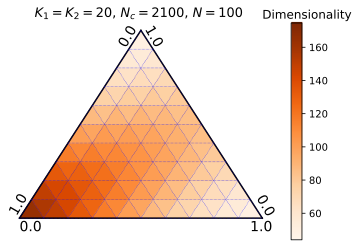

In [15]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_1,scale=n,cmap='Oranges')
tax.boundary()
#tax.left_axis_label("$p_3$",offset=0.14,fontsize=12)
#tax.right_axis_label("$p_2$",offset=0.14,fontsize=12)
#tax.bottom_axis_label("$p_1$",fontsize=12)

tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(10,9.2,r'Dimensionality',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$K_1 = K_2 = 20$, $N_c=2100$, $N=100$ ',y=1, fontsize=13)
plt.savefig('symmetric_Dim.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

### 3. Asymmetric Ternary plots

In [16]:
N = 100
M = 100
Nc = 2100
P = 80
K = 5
delta_sigma = 0.2
delta_eta = 0.2

n = 10  # grid size
Record_2= dict()


for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_2[(i,j,k)] = Dimension_theory(Nc,N,M,P,K,p1,p2,p3,f)

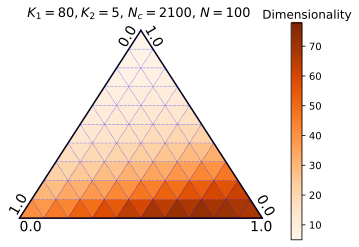

In [17]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_2,scale=n,cmap='Oranges')
tax.boundary()
#tax.left_axis_label("$p_3$",offset=0.14,fontsize=12)
#tax.right_axis_label("$p_2$",offset=0.14,fontsize=12)
#tax.bottom_axis_label("$p_1$",fontsize=12)

tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(10,9.2,r'Dimensionality',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$K_1 = 80, K_2 = 5$, $N_c=2100$, $N=100$ ',y=1, fontsize=13)
plt.savefig('Asymmetric_Dim.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()